In [1]:
using Plots;
pyplot();

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


In [6]:
function mandelbrot(points::Int, iterations::Int)
    # define helper functions
    f(z, c) = z^2 + c; # quadratic map
    check(x) = (abs(real(x)) > 2) || (abs(imag(x)) > 2); # bounds check
    
    # instantiate parameters
    rp = LinRange(-2, 2, points)
    ip = LinRange(-2, 2, points)
    values = [complex(i,j) for i ∈ rp, j ∈ ip];
    results = zeros(Int8, points, points);
    
    # main loop
    for idx in eachindex(values)
        x = copy(values[idx])
        z = 0
        for t in 0:iterations
            z = f(z, x)
            if check(z)
                results[idx] = t
            end
        end
    end
    return results
end

mandelbrot (generic function with 2 methods)

In [3]:
results = mandelbrot(10000, 100);

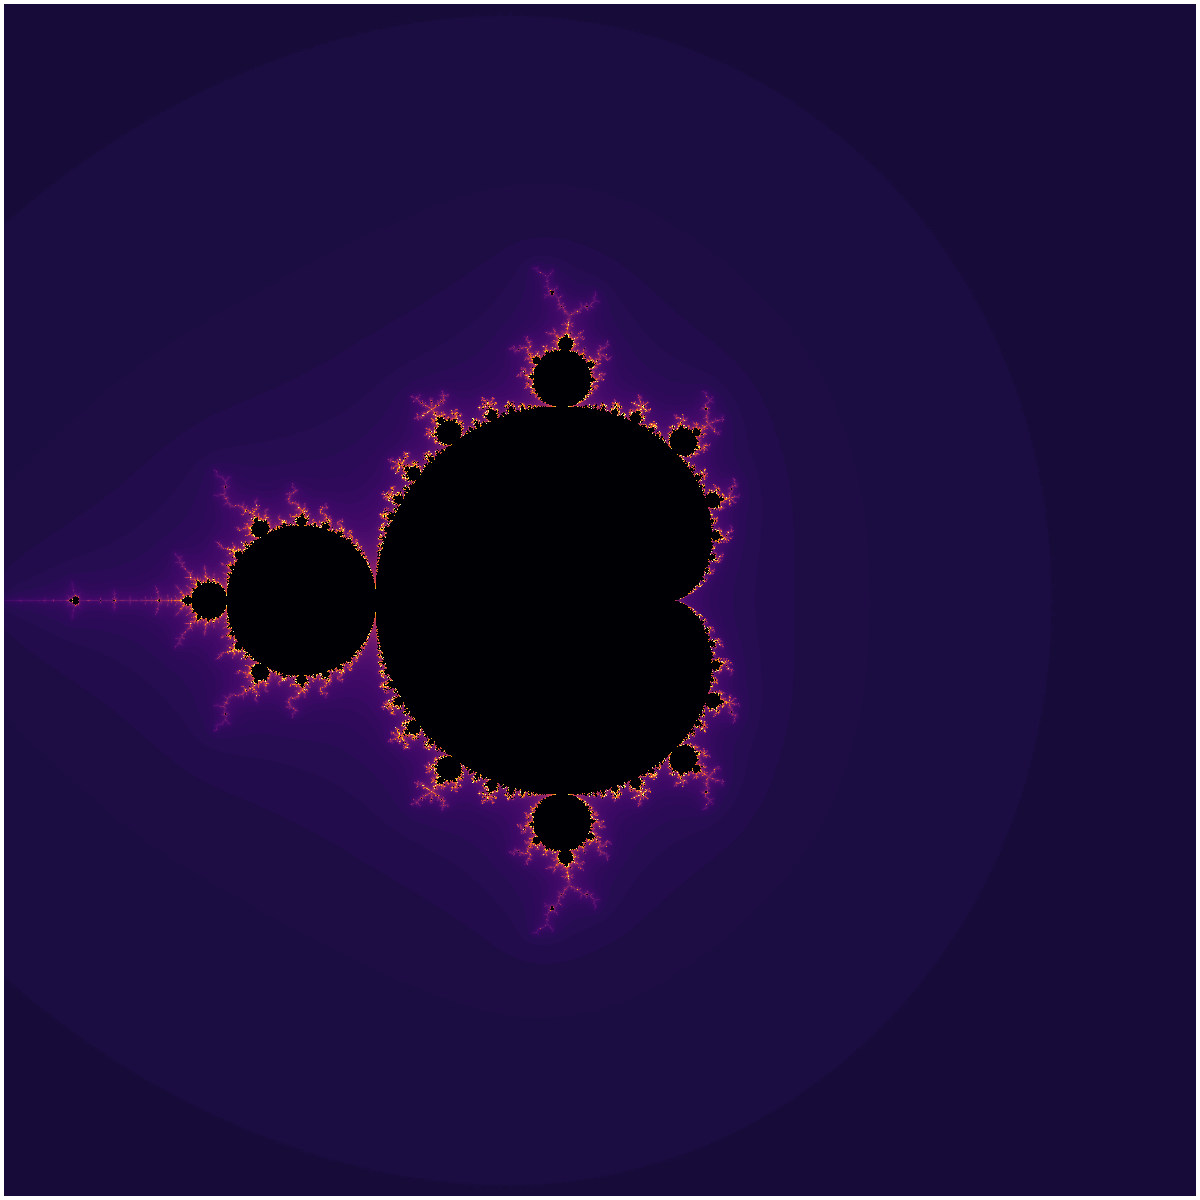

In [4]:
heatmap(
    1:10000,
    1:10000,
    results',
    axis=([], false),
    legend=false,
    colorbar=false,
    size=(1200,1200)
)

In [5]:
using Colors;
using Plots;
gr();

In [7]:
function collatz(N::Int) # lazy, brute force collatz
    counts = zeros(Int64, N)
    for i in 1:N
        counter = Int64(0)
        k = i
        while k != 1
            if iseven(k)
                k = Int(k/2)
            else
                k = Int(k * 3 + 1)
            end # end conditional
            counter += 1
        end # end while loop
        counts[i] = counter
    end # outer loop end
    return counts
end # function end

collatz (generic function with 1 method)

In [8]:
N = 10000000
counts = collatz(N);
x = 1:N
y = zeros(Int, N, 2)
d = 2
for idx in eachindex(counts)
    d = 2 - (d-1)
    y[idx, d] = counts[idx]
end

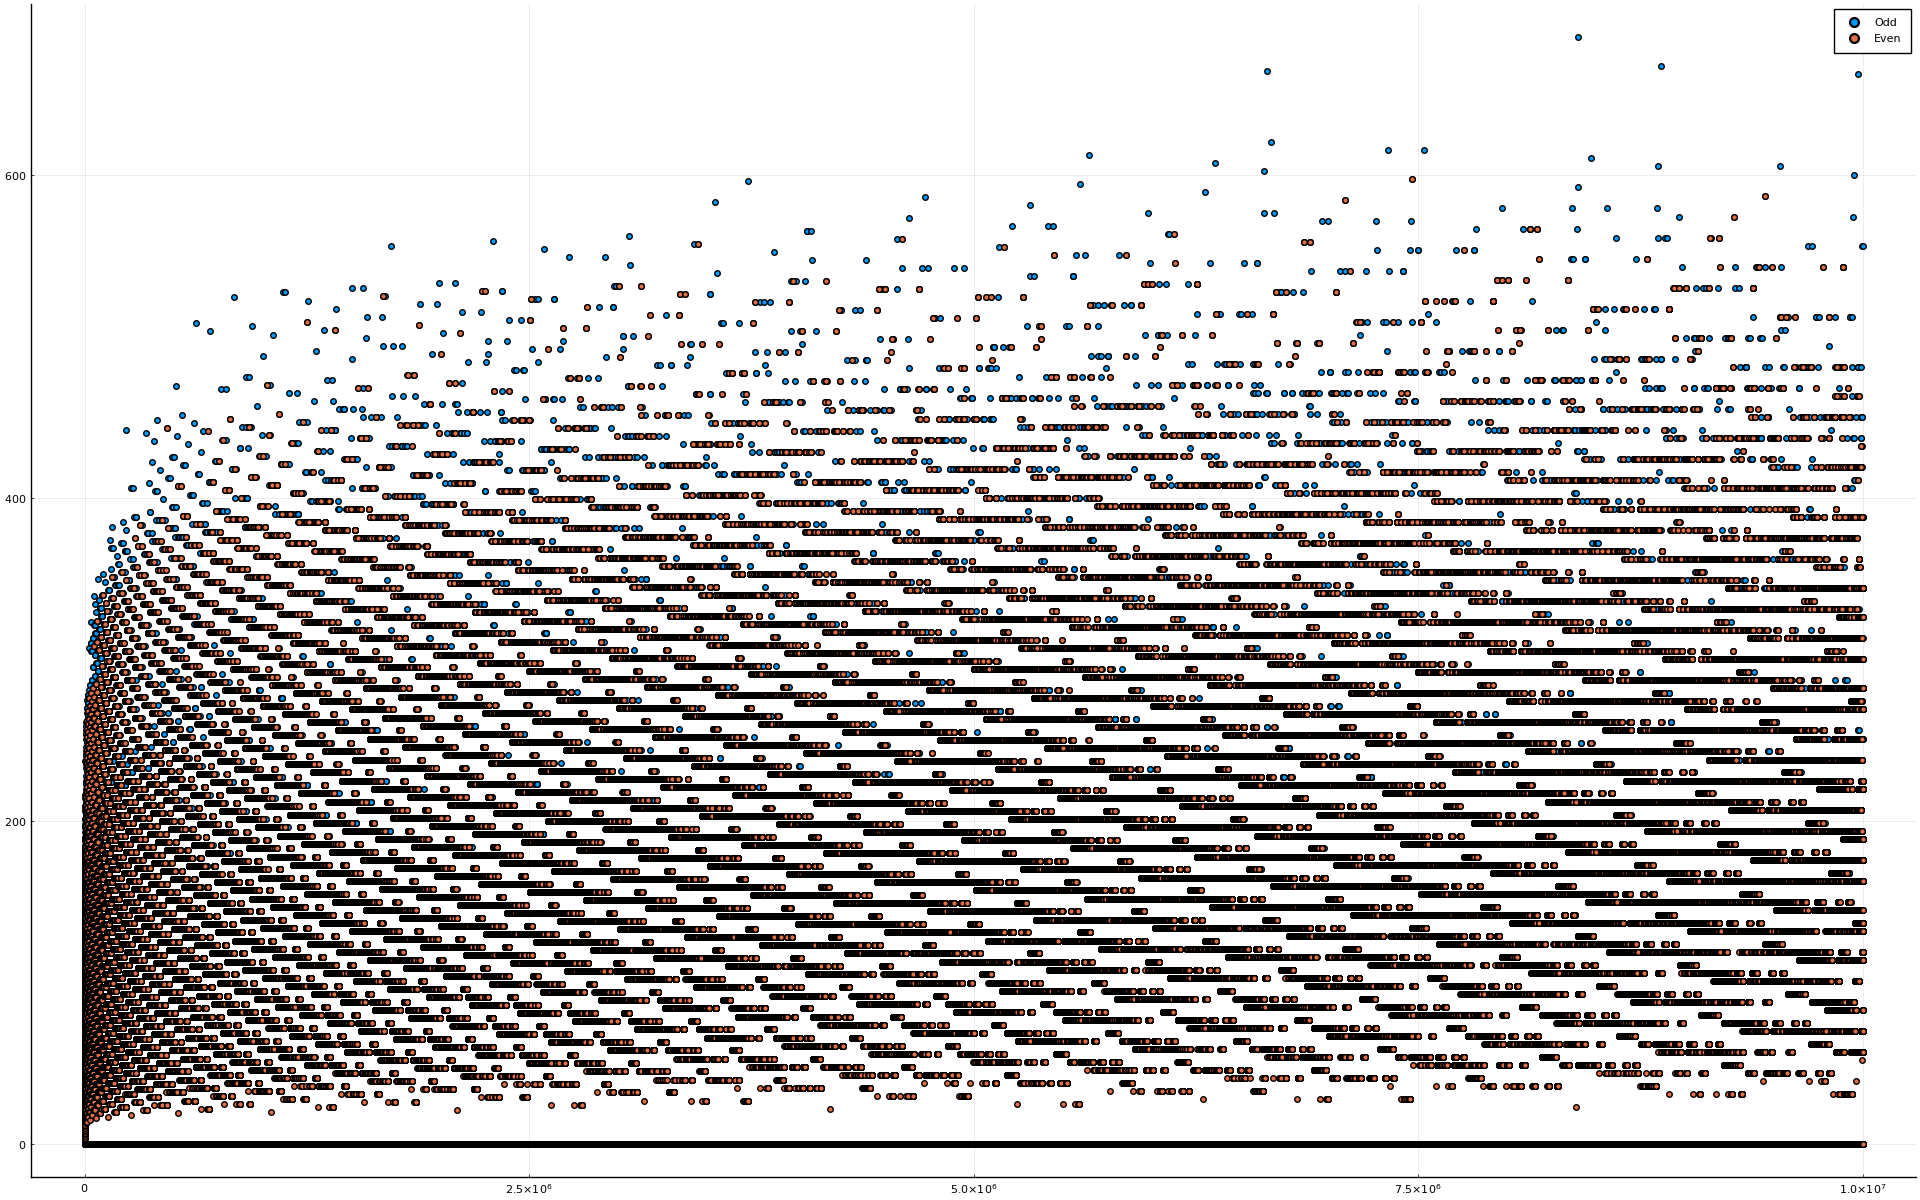

In [9]:
plot(x, y, seriestype=:scatter, size=(1920, 1200), labels=["Odd" "Even"])

In [1]:
using Plots;
gr();

In [112]:
function dynamic_time_warping(v1::Array, v2::Array)
    # Computes basic DTW distance between two signals
    path_x = []
    path_y = []
    dist_mat = zeros(size(v1)[1], size(v2)[1])
    dist_mat .= Inf
    # build distance matrix using DTW rule: D_ij = |v1_i-v2_j| + min(D_i-1,j; D_i-1,j-1; D_i,j-1)
    for i in 1:size(v1)[1]
        for j in 1:size(v2)[1]
            if i==1 && j==1
                dist_mat[i,j] = 0
            else
                r = max(i-1, 1)
                c = max(j-1, 1)
                dist_mat[i,j] = abs(v1[i] - v2[j]) + min(dist_mat[r, j], dist_mat[r,c], dist_mat[i, c])
            end # end conditional
        end # end inner loop
    end # end outer loop
    i = size(v1)[1]
    j = size(v2)[1]
    # walk the shortest path back
    while i>1 || j>1
        push!(path_x, i)
        push!(path_y, j)
        r = max(i-1, 1)
        c = max(j-1, 1)
        indices = [(r,j), (i,c), (r,c)]
        idx = argmin([dist_mat[r,j], dist_mat[i,c], dist_mat[r,c]])
        i,j = indices[idx]
    end
    return dist_mat, path_x, path_y
end # end function

dynamic_time_warping (generic function with 1 method)

In [115]:
x = LinRange(-2π, 2π, 5000)
v1=sin.(x) .- cos.(x).^2;
v2=3*sin.(x)/2;
mat, px, py = dynamic_time_warping(v1,v2);

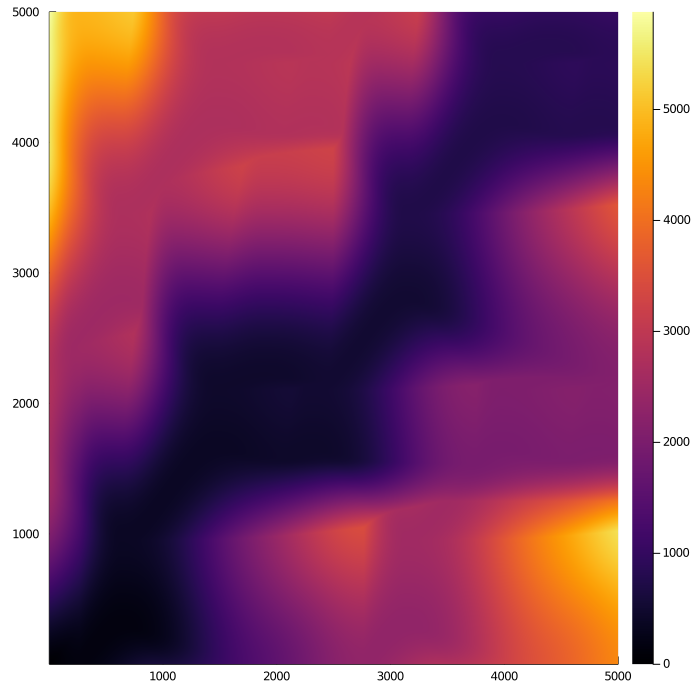

In [116]:
heatmap(1:size(v1)[1], 1:size(v2)[1], mat', size=(700,700))

In [1]:
using Plots;
gr();

In [28]:
function langton_ant(dim::Int, iterations::Int, random_start::Bool=false)
    # most basic version of Langton's Ant
    rules = Dict('U'=>[-1,0], 'R'=>[0, 1], 'D'=>[1, 0], 'L'=>[0,-1])
    directions = ['U', 'R', 'D', 'L']
    start = random_start ? [rand(1:dim), rand(1:dim)] : [dim÷2, dim÷2]
    ant = [start, 'U'] 
    world = zeros(dim, dim)
    
    for it ∈ 1:iterations
        loc, dir = ant
        if world[loc...] == 0
            newdir = directions[mod1(findfirst(x->x==dir, directions)+1, 4)]
            world[loc...] = 1
        else
            newdir = directions[mod1(findfirst(x->x==dir, directions)-1, 4)]
            world[loc...] = 0
        end
        ant[1] = mod1.(ant[1]+rules[newdir], dim)
        ant[2] = newdir
    end
    return world
end

langton_ant (generic function with 2 methods)

In [29]:
res = langton_ant(200, 20000, false);

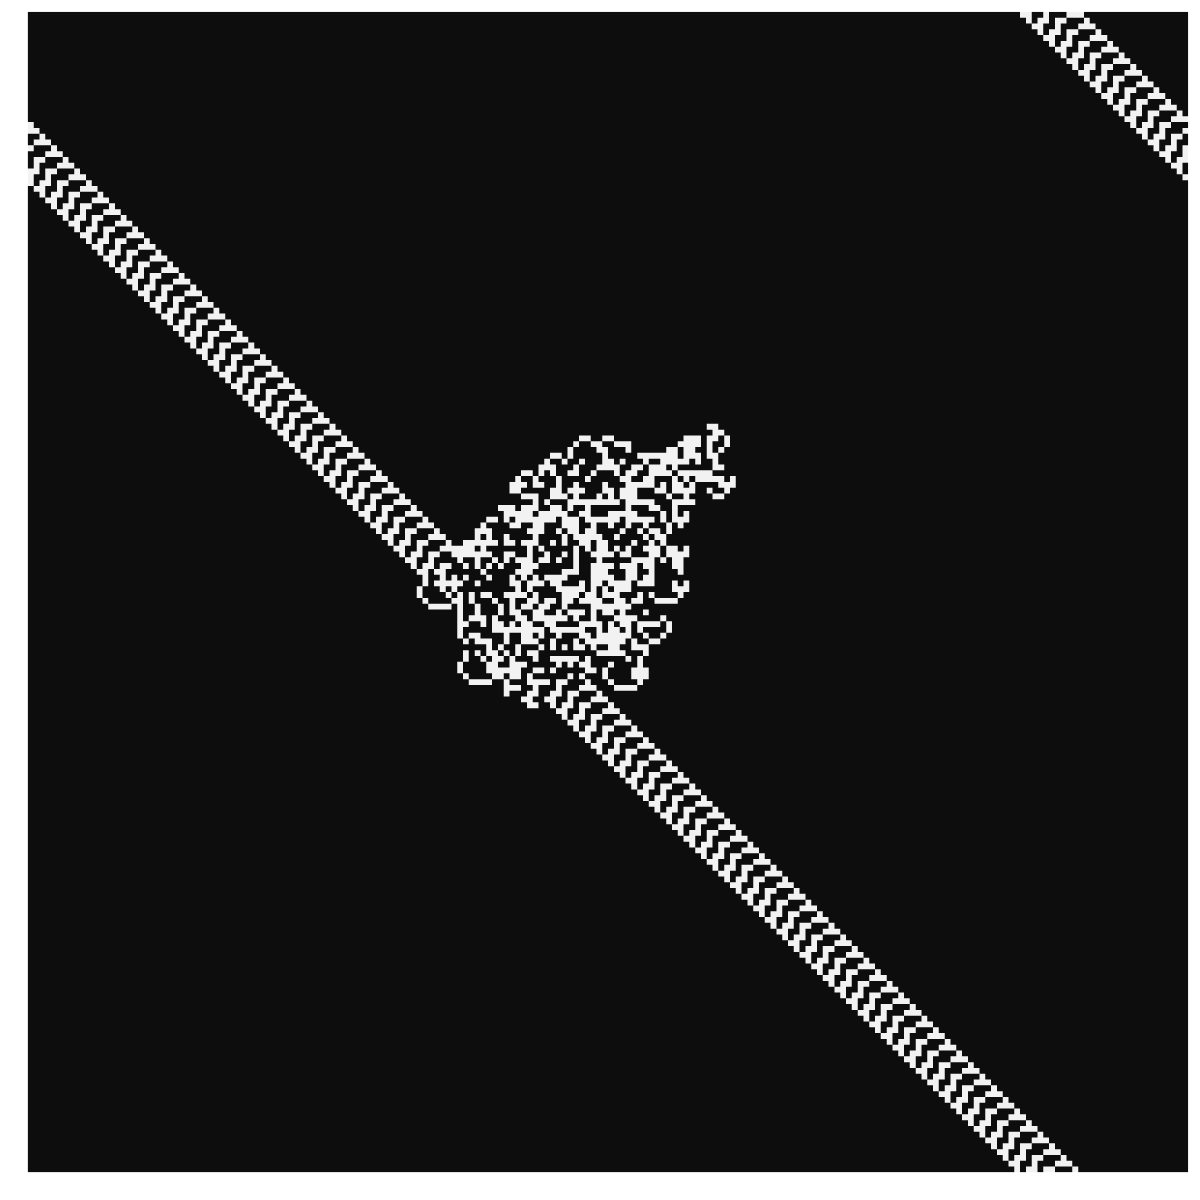

In [30]:
using Plots;
gr();
heatmap(res',
    c = :grays,
    axis=([], false),
    legend=false,
    colorbar=false,
    size=(1200,1200))